In [1]:
import json
import pymongo
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt
from numpy import arange
import random
import pandas

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db=client["rhobs"]
mycollaction=db["people"]

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/")

def collection(uri):
    client = MongoClient(uri)
    database = client["rhobs"]
    collection = database["people"]
    return collection

In [4]:
def load(uri="mongodb://localhost:27017/", datapath=r"C:\Users\anass\Downloads\.ipynb_checkpoints\data.json"):
    coll = collection(uri=uri)
    with open(datapath, "r") as fp:
        data = json.load(fp)
        for person in data:
            coll.insert_one(person)


In [5]:
collection("mongodb://localhost:27017/")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'rhobs'), 'people')

In [6]:
load()

In [7]:
client.list_database_names()


['admin', 'config', 'local', 'rhobs']

In [8]:
def find_all():
    people = mycollaction.find()
    for person in people:
        print(person)

In [9]:
find_all()

{'_id': ObjectId('6424d08f97d5a1ad8d2db1fa'), 'job': 'expert automobile', 'company': 'Neveu SA', 'ssn': '261034101814319', 'residence': '77, rue Bigot\n69583 PineauVille', 'current_location': [61.800313, -7.789611], 'blood_group': 'AB-', 'website': ['http://www.teixeira.com/', 'http://laurent.com/', 'https://bouvier.com/', 'http://perez.fr/'], 'username': 'hmaillard', 'name': 'Arnaude Fischer', 'sex': 'F', 'address': '69, rue de Gilbert\n70052 Saint LouiseBourg', 'mail': 'veronique79@ifrance.com', 'birthdate': '1998-02-28'}
{'_id': ObjectId('6424d08f97d5a1ad8d2db1fb'), 'job': 'chargé de recherche en acoustique musicale', 'company': 'Gautier', 'ssn': '145088400768545', 'residence': '15, rue Hugues Breton\n05703 Becker', 'current_location': [-51.571988, 22.39516], 'blood_group': 'B-', 'website': ['http://berthelot.net/', 'http://www.meunier.com/', 'https://marechal.com/'], 'username': 'lauremarin', 'name': 'Chantal Valette', 'sex': 'F', 'address': 'chemin Gomes\n51854 Potier', 'mail': 'm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
df = pandas.DataFrame(mycollaction.find())


In [11]:
df.head()

,_id,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,6424d08f97d5a1ad8d2db1fa,expert automobile,Neveu SA,261034101814319,"77, rue Bigot\n69583 PineauVille","[61.800313, -7.789611]",AB-,"[http://www.teixeira.com/, http://laurent.com/...",hmaillard,Arnaude Fischer,F,"69, rue de Gilbert\n70052 Saint LouiseBourg",veronique79@ifrance.com,1998-02-28
1,6424d08f97d5a1ad8d2db1fb,chargé de recherche en acoustique musicale,Gautier,145088400768545,"15, rue Hugues Breton\n05703 Becker","[-51.571988, 22.39516]",B-,"[http://berthelot.net/, http://www.meunier.com...",lauremarin,Chantal Valette,F,chemin Gomes\n51854 Potier,manon22@hotmail.fr,2004-07-13
2,6424d08f97d5a1ad8d2db1fc,juge d'instruction,Gaillard SARL,108023155510639,"58, boulevard Benoît Ramos\n51834 Blin","[53.595249, -118.088591]",O+,"[https://www.leduc.fr/, http://dupre.fr/, http...",frederic74,Claude Fouquet,F,"29, avenue Jeannine Maréchal\n49185 Lelièvre",theophile66@dbmail.com,1919-03-25
3,6424d08f97d5a1ad8d2db1fd,administrateur territorial,François,138058619458217,"12, avenue Yves Faivre\n94118 Sainte AdrienneV...","[-58.812559, -43.531101]",A-,"[https://www.brun.org/, http://www.dufour.com/...",jeannele-goff,Julien de Munoz,M,rue de Dufour\n57356 Martinez,georgesveronique@tiscali.fr,1927-11-04
4,6424d08f97d5a1ad8d2db1fe,chercheur en physique,Hoarau et Fils,194062123178361,chemin de Martin\n12683 Guillot,"[38.5796055, 40.159154]",A+,[https://www.valette.com/],xleroux,Aimée Boutin de la Jacques,F,"197, rue Teixeira\n57380 Lenoir",alix63@wanadoo.fr,1921-11-04


In [12]:
def nb_femme():
    count=mycollaction.count_documents(filter={"sex":"F"})
    print("nombre de femme is",count)

In [13]:
nb_femme()

nombre de femme is 25042


In [14]:
def nb_Homme():
    count=mycollaction.count_documents(filter={"sex":"M"})
    print("nombre de homme is",count)

In [15]:
nb_Homme()

nombre de homme is 24958


In [ ]:
#########################################################################################################################

In [ ]:
#j'ai fait l'exercie 3 avant 2

In [16]:
# cette fonction pour convertir l'age
def age(a):
    date_naissance = datetime.strptime(a, "%Y-%m-%d").date()
    aujourdhui = datetime.today().date()
    age = aujourdhui.year - date_naissance.year - ((aujourdhui.month, aujourdhui.day) < (date_naissance.month, date_naissance.day))

    return age

In [17]:
age("1996-9-1")

26

In [18]:
#convertir l'age de chaque personne et l'ajouter a la base mongodb
def ajouter_age():
    for document in mycollaction.find():
        s=age(document['birthdate'])
        mycollaction.update_one({'_id': document['_id']}, {"$set": {"age": s}})

In [19]:
ajouter_age()

In [20]:
def metier_age(metier):
    hommes = []
    femmes = []
   
    for document in mycollaction.find():
        if metier in (document['job']):
            if document['sex'] == 'F':
                
                hommes.append(document["age"])
            else:
                femmes.append(document["age"])
                
            
    return hommes,femmes

In [21]:
print(metier_age("juriste"))

([109, 41, 101, 2, 97, 115, 38, 102, 35, 59, 23, 11, 48, 55, 34, 47, 57, 23, 30, 85, 16, 10, 116, 64, 28, 67, 27, 34, 115, 30, 29, 87, 40, 23, 86, 73, 92, 11, 39, 9, 102, 98, 69, 50, 7, 65, 115, 66, 83, 27, 78, 44, 65, 102, 20, 12, 15, 99, 92, 79, 3, 103, 55, 6, 59, 73, 63, 79, 59, 13, 98, 57, 116, 85, 69, 76, 10, 12, 105, 84, 40, 84, 81, 21, 30, 73, 58, 115, 112, 94, 111, 83, 67, 58, 30, 73, 40, 23, 104, 82, 103, 61, 34, 100, 109, 16, 26, 51, 110, 40, 63, 59, 59, 10, 78, 96, 7, 42, 35, 99, 112, 33, 45, 3, 20, 89], [41, 20, 17, 106, 98, 66, 81, 74, 60, 61, 50, 60, 112, 18, 22, 27, 65, 74, 35, 30, 91, 32, 10, 66, 2, 18, 58, 4, 9, 23, 101, 116, 63, 111, 83, 14, 51, 77, 37, 47, 102, 99, 67, 57, 39, 3, 58, 101, 84, 66, 51, 36, 5, 76, 78, 18, 69, 68, 35, 40, 42, 83, 23, 24, 14, 29, 58, 1, 70, 56, 86, 5, 86, 18, 94, 1, 71, 88, 96, 62, 65, 30, 44, 72, 53, 107, 34, 107, 87, 7, 2, 61, 91, 69, 60, 100, 30, 37, 116, 71, 27, 55, 70, 98, 36, 111, 109, 43, 98, 2, 23, 17, 21, 83, 4, 27, 87, 116, 71, 

In [22]:
homme,femme=metier_age("avion")


In [23]:
len(femme)

36

In [29]:
def show_pyramid(metier):
    homme,femme=metier_age(metier)
    total_male_population = sum(homme)
    total_female_population = sum(femme)
    male_proportions = [x / total_male_population for x in homme]
    female_proportions = [x / total_female_population for x in femme]

    # Tracé de la pyramide d'âge
    fig, ax1 = plt.subplots()

    ax1.barh(homme, male_proportions, align='center',  color='blue')
    ax1.barh(femme, [-x for x in female_proportions], align='center', color='red')
    ax1.invert_xaxis()
    ax1.set_xlabel('Hommes___________________Femme')
    ax1.set_ylabel('Âges')
    ax1.set_title(f'Pyramide des âges pour ')

    # Afficher le graphique
    return plt.show()

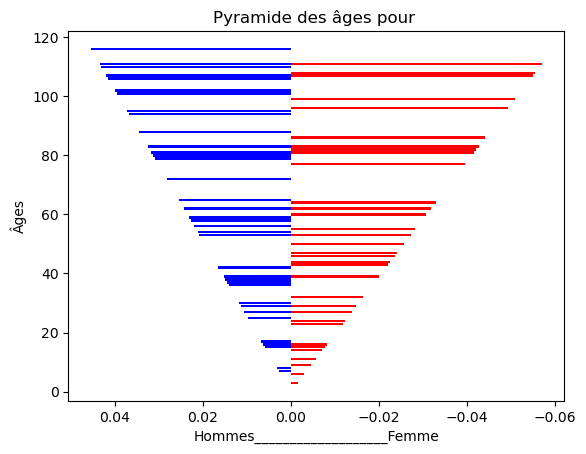

In [30]:
show_pyramid('avion')

In [ ]:
##########################################################################################################################

In [ ]:
#exercice 2 :

In [31]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db=client["societe"]
mycollaction=db["entreprise"]

In [32]:
def collection(uri):
    client = MongoClient(uri)
    database = client["societe"]
    collection = database["entreprise"]
    return collection


In [33]:
def load(uri="mongodb://localhost:27017/", datapath=r"C:\Users\anass\OneDrive\Bureau\lalou.json"):
    coll = collection(uri=uri)
    with open(datapath, "r") as fp:
        data = json.load(fp)
        for entreprise in data:
            coll.insert_one(entreprise)

In [34]:
collection("mongodb://localhost:27017/")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'societe'), 'entreprise')

In [35]:
load()

In [36]:
client.list_database_names()


['admin', 'config', 'local', 'rhobs', 'societe']

In [37]:
number_list = [200, 1500, 2000, 1500, 1600,1332,200, 1102, 1999, 1500, 3520,1332,200, 100, 1400, 1500, 6000,1332,200, 50, 300, 1500, 1700]


In [38]:
# ajouter les nombres des personnes a mongodb
def ajouter_nb_personnes():
    for document in mycollaction.find():
        a=random.choice(number_list)
        b=mycollaction.update_one({'_id': document['_id']}, {"$set": {"nb_personnes": a}})
    

In [39]:
ajouter_nb_personnes()

In [40]:
def find_company(n):
    for document in mycollaction.find():
        if n < (document['nb_personnes']):
            s=print('l entreprise',document['Name'],'a un nombres de personne=',document['nb_personnes'],'>',n)
    return s

In [41]:
find_company(500)

l entreprise 3M a un nombres de personne= 1500 > 500
l entreprise A. O. Smith a un nombres de personne= 1500 > 500
l entreprise Abbott a un nombres de personne= 1999 > 500
l entreprise AbbVie a un nombres de personne= 2000 > 500
l entreprise Accenture a un nombres de personne= 3520 > 500
l entreprise Activision Blizzard a un nombres de personne= 1500 > 500
l entreprise ADM a un nombres de personne= 1500 > 500
l entreprise Adobe Inc. a un nombres de personne= 1400 > 500
l entreprise ADP a un nombres de personne= 1999 > 500
l entreprise Advance Auto Parts a un nombres de personne= 1700 > 500
l entreprise AES Corporation a un nombres de personne= 1500 > 500
l entreprise Aflac a un nombres de personne= 1332 > 500
l entreprise Agilent Technologies a un nombres de personne= 1700 > 500
l entreprise Air Products and Chemicals a un nombres de personne= 1332 > 500
l entreprise Akamai a un nombres de personne= 1500 > 500
l entreprise Albemarle Corporation a un nombres de personne= 3520 > 500
l en